Eclipse Detection
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.2 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.2,<2.3"

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.ipynb) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

phoebe.devel_on() # DEVELOPER MODE REQUIRED FOR VISIBLE_PARTIAL - DON'T USE FOR SCIENCE

logger = phoebe.logger()

b = phoebe.default_binary()

Let's just compute the mesh at a single time-point that we know should be during egress.

In [3]:
b.add_dataset('mesh', times=[0.05], columns=['visibilities'])

Wed, 11 Dec 2019 13:33 BUNDLE       WARNING mesh dataset uses 'compute_times' instead of 'times', applying value sent as 'times' to 'compute_times'.


<ParameterSet: 8 parameters | contexts: constraint, compute, dataset>

Native
-------------------

The 'native' eclipse method computes what percentage (by area) of each triangle is visible at the current time.  It also determines the centroid of the visible portion of each triangle.

Physical quantities (temperatures, intensities, velocities, etc) are computed at the vertices of each triangle, and this centroid is then used to determine the average quantity across the visible portion of the triangle (by assuming a linear gradient across the triangle).

Let's plot the visibilities (ratio of the area that is visible) as the color scale, with red being completely hidden and green being completely visible. 

In [4]:
b.run_compute(eclipse_method='native')

<ParameterSet: 14 parameters | contexts: model, figure>

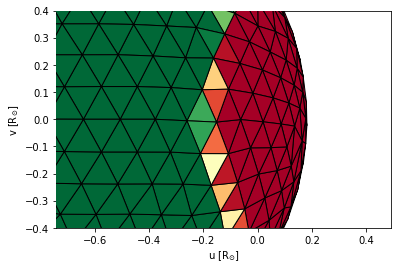

In [5]:
afig, mplfig = b.plot(component='primary', fc='visibilities', xlim=(-0.5, 0.25), ylim=(-0.4, 0.4), show=True)

Visible Partial
-----------

The 'visible partial' eclipse method simply determines which triangles are hidden, which are visible, and which are partially visible.  It then assigns a visibility of 0.5 to any partially visible triangles - meaning they will contribute half of their intensities when integrated (assume that half of the area is visible).  There are no longer any centroids - values are still computed at the vertices but are then averaged to be at the geometric center of EACH triangle.

Again, let's plot the visibilities (ratio of the area that is visible) as the color scale, with red being completely hidden and green being completely visible.

In [6]:
b.run_compute(eclipse_method='visible_partial')

Wed, 11 Dec 2019 13:33 BUNDLE       WARNING overwriting model: latest


<ParameterSet: 14 parameters | contexts: model, figure>

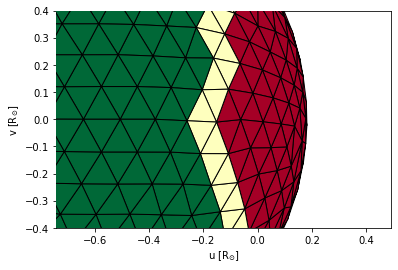

In [7]:
afig, mplfig = b.plot(component='primary', fc='visibilities', xlim=(-0.5, 0.25), ylim=(-0.4, 0.4), show=True)